<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/10_(sat)_12_01_00_pm_B_NIR_savgol_not_use_R2%3D_1_5611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.graph_objects as go
import plotly.express as px

from scipy.signal import savgol_filter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filename_a='/content/drive/MyDrive/machine_learning/B_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")
data=data_a

In [5]:
data.head()

,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,2,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,3,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,4,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,5,False,5.1,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576


In [16]:
xdata=list(data.columns)[3:]


In [18]:
y=data['Y_B'].values
X=data.values[:,3:]

In [23]:
X.shape, y.shape


((624, 1779), (624,))

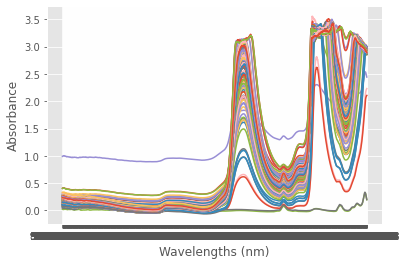

In [24]:
with plt.style.context('ggplot'):
    plt.plot(xdata, X.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")

In [45]:
#X2 = savgol_filter(X, 17, polyorder=2, deriv=2)
#X2 = savgol_filter(X, 17, polyorder=2, deriv=1)
X2=X

In [46]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [48]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [49]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

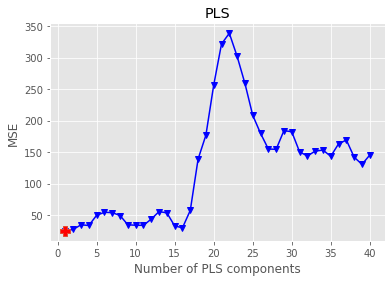

In [50]:
plot_metrics(mses, 'MSE', 'min')

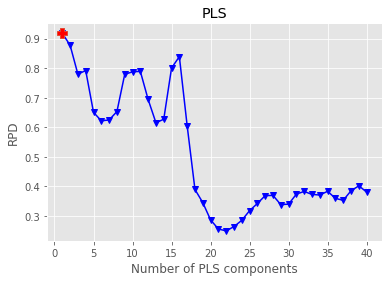

In [51]:
plot_metrics(rpds, 'RPD', 'max')

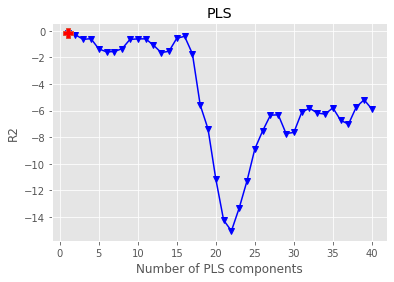

In [52]:
plot_metrics(r2s, 'R2', 'max')

In [53]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [54]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: -1.5611, MSE: 54.0484, RPD: 0.6249


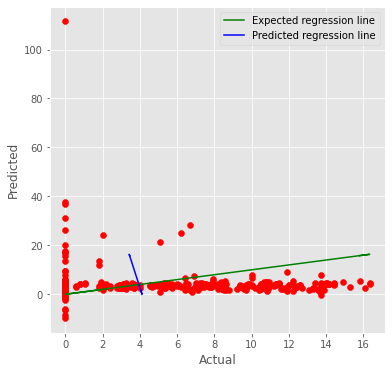

In [55]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()